# Project Title: UPI Fraud Detection using Machine Learning 

## Introduction

Welcome to the project on UPI fraud detection using machine learning! In this project, we aim to develop machine learning models to detect fraudulent transactions in UPI (Unified Payments Interface) data.

## Project Information

### Developer Names: 
    Anuj Rastogi
    Ramya Karanam
    Atul Kumar
    Manish Ramadhar Nirmal
    Shourya Goenka
    Marudala Vinay Kadadevaru
    Jai Naik

### Date of Completion:
- 08th May 2024

### Data Source:
The dataset used in this project is a synthetically created dataset containing 50,000 rows of UPI transaction data. It has been modified to include variability and patterns for fraud detection purposes.

You can find the dataset here: [UPI Fraud Detection Dataset](https://github.com/anujR1994/UPI-Fraud-detection/blob/main/UPI%20Latest%20data.csv)

## About the Dataset
The dataset contains transaction data related to UPI (Unified Payments Interface) transactions. It includes various features related to transactions and fraud indicators.

### Features:
- Transaction_ID: Unique identifier for each transaction.
- Date: Date of the transaction.
- Time: Time of the transaction.
- Merchant_ID: Unique identifier for the merchant involved in the transaction.
- Customer_ID: Unique identifier for the customer involved in the transaction.
- Device_ID: Unique identifier for the device used for the transaction.
- Transaction_Type: Type of transaction (e.g., payment, transfer, etc.).
- Payment_Gateway: Payment gateway used for the transaction.
- Transaction_City: City where the transaction took place.
- Transaction_State: State where the transaction took place.
- IP_Address: IP address associated with the transaction.
- Transaction_Status: Status of the transaction (e.g., success, failure, etc.).
- Device_OS: Operating system of the device used for the transaction.
- Transaction_Frequency: Frequency of transactions for the customer.
- Merchant_Category: Category of the merchant involved in the transaction.
- Transaction_Channel: Channel used for the transaction (e.g., mobile app, website, etc.).
- Transaction_Amount_Deviation: Deviation of the transaction amount from the average transaction amount.
- Days_Since_Last_Transaction: Number of days since the last transaction.
- Amount: Transaction amount.
- Fraud: Indicates whether the transaction is fraudulent (1) or not (0).

## Methodology
1. Data Preprocessing: Cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.
2. Exploratory Data Analysis: Understanding the distribution of features and identifying patterns related to fraud.
3. Feature Engineering: Creating new features or transforming existing ones to improve model performance.
4. Model Development: Training machine learning models for fraud detection.
5. Model Evaluation: Assessing model performance using metrics such as accuracy, precision, recall, and F1-score.
6. Conclusion: Summarizing findings and discussing potential areas for improvement.

Let's dive into the project and start exploring the data!

In [2]:
# Importing Libaries

import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset  
df =pd.read_csv("UPI Latest data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   Date                          50000 non-null  object 
 2   Time                          50000 non-null  object 
 3   Merchant_ID                   50000 non-null  object 
 4   Customer_ID                   50000 non-null  object 
 5   Device_ID                     50000 non-null  object 
 6   Transaction_Type              50000 non-null  object 
 7   Payment_Gateway               50000 non-null  object 
 8   Transaction_City              50000 non-null  object 
 9   Transaction_State             50000 non-null  object 
 10  IP_Address                    50000 non-null  object 
 11  Transaction_Status            50000 non-null  object 
 12  Device_OS                     50000 non-null  object 
 13  T

In [5]:
df.shape

(50000, 20)

In [6]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00000001,23/10/23,4:36:16 AM,8bbd74bb-c7ab-4d9a-8cae-29bf6777bba4,bbd15462-34e8-4d84-b38d-c0a48ca151a5,35c93295-5585-40ec-9ba8-2ff3a3ed9246,Purchase,ICICI UPI,Mango,Uttarakhand,72.74.226.105,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0
1,T00000002,31/05/23,4:36:16 AM,1f0efdbe-f18c-4668-aba3-b7674d5e0100,d93133d4-b039-4d19-8060-b8b3d8de4c0d,8e40bf94-19f0-4a27-a154-05ebfd14c5aa,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,111.214.109.143,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0
2,T00000003,19/01/24,4:36:16 AM,fb552d01-e704-440e-b29b-6c152ed37998,8d610bff-9b2b-41d5-86f7-df78c5aee909,b8f5781f-2b91-4c41-a1bf-25d69ba32ec1,Bill Payment,CRED,Khammam,Andhra Pradesh,111.0.26.121,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0
3,T00000004,18/09/23,5:07:24 AM,43001ee3-c6ca-4033-89e9-9502b3072bb7,63d01a4c-3e68-49c6-a54c-e7ea14cfba44,725a2ef7-5e4b-4a20-b486-a647d9005cdf,Other,HDFC,Nanded,Odisha,166.88.212.66,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0
4,T00000005,18/08/23,12:16:28 PM,df1c84af-fa42-4ce7-99ea-5a9fd657361e,4c2613de-9129-4ab2-a2b4-dd6e008a487d,10dfb43d-6fb5-4e9f-9159-ffaf691b67c5,Other,HDFC,Machilipatnam,West Bengal,20.34.147.155,Failed,Windows,2,Other,Online,36.14,5,35.72,0


### DATA PREPARATION

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check missing values
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [9]:
# Check unique values
df.nunique()

Transaction_ID                  50000
Date                              367
Time                            29624
Merchant_ID                     50000
Customer_ID                     50000
Device_ID                       50000
Transaction_Type                    7
Payment_Gateway                     9
Transaction_City                  316
Transaction_State                  28
IP_Address                      50000
Transaction_Status                  3
Device_OS                           4
Transaction_Frequency              20
Merchant_Category                  10
Transaction_Channel                 3
Transaction_Amount_Deviation    18417
Days_Since_Last_Transaction        29
amount                           9766
fraud                               2
dtype: int64

In [10]:
# Find unique columns with unique values
unique_columns = df.columns[df.nunique() == len(df)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID',
       'IP_Address'],
      dtype='object')


In [11]:
# Droping ID columns as they do not add any value to the analysis
df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

### Data Cleaning and Feature Engineering

In [12]:
# Date column
df['Date'].head()

0    23/10/23
1    31/05/23
2    19/01/24
3    18/09/23
4    18/08/23
Name: Date, dtype: object

In [13]:
# Converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

In [14]:
# Extracting year from date
df['Year'] = df['Date'].dt.year

In [15]:
# Extracting month from date
df['Month']= df['Date'].dt.month

# Now month needs to be in MMM format

In [16]:
# Checking columns
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [17]:
# First 5 rows
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-23,4:36:16 AM,Purchase,ICICI UPI,Mango,Uttarakhand,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0,2023,10
1,2023-05-31,4:36:16 AM,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0,2023,5
2,2024-01-19,4:36:16 AM,Bill Payment,CRED,Khammam,Andhra Pradesh,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0,2024,1
3,2023-09-18,5:07:24 AM,Other,HDFC,Nanded,Odisha,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0,2023,9
4,2023-08-18,12:16:28 PM,Other,HDFC,Machilipatnam,West Bengal,Failed,Windows,2,Other,Online,36.14,5,35.72,0,2023,8


In [18]:
# Checking the unique values in the month column
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [19]:
# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [20]:
# Map the 'Month' column values to their corresponding month names
df['Month'] = df['Month'].map(months)


In [21]:
# Descriptive statistics for numerical variables
numerical_stats = df.describe().T
print("Descriptive statistics for numerical variables:")
numerical_stats

Descriptive statistics for numerical variables:


,count,mean,min,25%,50%,75%,max,std
Date,50000,2023-10-12 02:57:21.024000256,2023-04-12 00:00:00,2023-07-13 00:00:00,2023-10-13 00:00:00,2024-01-11 00:00:00,2024-04-12 00:00:00,NaN
Transaction_Frequency,50000.0,3.7891,0.0,1.0,2.0,3.0,90.0,7.165309
Transaction_Amount_Deviation,50000.0,0.036824,-100.0,-49.94,-0.245,49.9325,99.99,57.766852
Days_Since_Last_Transaction,50000.0,15.01206,1.0,8.0,15.0,22.0,29.0,8.361009
amount,50000.0,39.886908,0.0,13.81,26.97,42.87,7432.48,130.70298
fraud,50000.0,0.01548,0.0,0.0,0.0,0.0,1.0,0.123453
Year,50000.0,2023.2793,2023.0,2023.0,2023.0,2024.0,2024.0,0.44866


### Inference:
      Transaction Frequency:
                Users, on average, make around 4 transactions.
                The number of transactions per user varies widely, from 0 to 90.
                
      Transaction Amount Deviation:
                The average deviation from expected transaction amounts is very low, around 0.04.
                However, this deviation varies greatly, from -100 to 99.99.
                
      Days Since Last Transaction:
                 On average, users make a transaction every 15 days.
                 The time since the last transaction ranges from 1 day to 29 days.
                 
      Amount:
                 On average, transaction amounts are around 40 units.
                 Transaction amounts range from 0 to 7432.48 units.
                 
      Fraud:
                 Only around 1.5% of transactions are fraudulent.
                 
      Year:
                 The data mainly spans the year 2023, with a small portion from 2024.

In [22]:
# Distribution of target variable
df['fraud'].value_counts(normalize=True)*100 

fraud
0    98.452
1     1.548
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

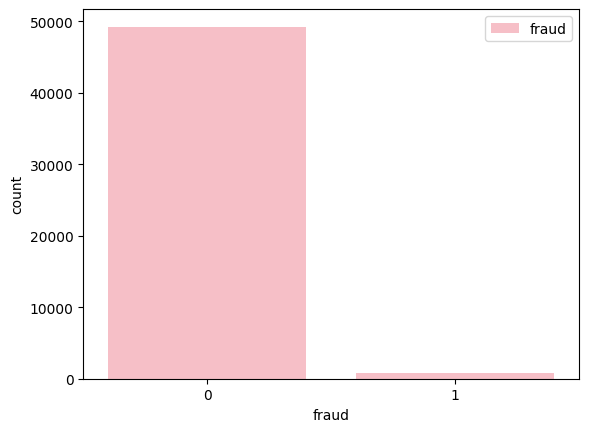

In [23]:
# Distribution of target variable
sns.countplot(x='fraud', data=df,color='lightpink', label= 'fraud')

###  Create separate DataFrames for normal and fraudulent transactions


In [24]:
# Create separate DataFrames for normal and fraudulent transactions
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [25]:
fraud.shape

(774, 17)

In [26]:
# Check the fraud DataFrame
fraud.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
88,2023-08-07,11:16:29 AM,Investment,Paytm,Gopalpur,Himachal Pradesh,Failed,Windows,1,Donations and Devotion,In-store,-30.55,14,44.26,1,2023,Aug
89,2023-07-29,7:26:15 AM,Investment,ICICI UPI,Sonipat,Punjab,Pending,Android,1,More Services,Mobile,-40.54,13,324.50,1,2023,Jul
434,2023-05-23,5:24:39 AM,Bill Payment,Paytm,Orai,Tamil Nadu,Failed,Android,3,More Services,In-store,83.32,22,176.32,1,2023,May
435,2023-07-12,10:50:16 AM,Refund,ICICI UPI,Tumkur,Andhra Pradesh,Failed,Windows,1,Financial services and Taxes,In-store,-74.45,27,337.41,1,2023,Jul
553,2023-12-29,11:19:11 AM,Subscription,Razor Pay,Chinsurah,Madhya Pradesh,Pending,MacOS,2,Purchases,In-store,1.11,24,220.11,1,2023,Dec


In [27]:
fraud.dtypes

Date                            datetime64[ns]
Time                                    object
Transaction_Type                        object
Payment_Gateway                         object
Transaction_City                        object
Transaction_State                       object
Transaction_Status                      object
Device_OS                               object
Transaction_Frequency                    int64
Merchant_Category                       object
Transaction_Channel                     object
Transaction_Amount_Deviation           float64
Days_Since_Last_Transaction              int64
amount                                 float64
fraud                                    int64
Year                                     int32
Month                                   object
dtype: object

In [28]:
fraud['Date'] = fraud['Date'].astype(object)
df['Date'] = df['Date'].astype(object)


In [29]:
fraud.dtypes

Date                             object
Time                             object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

### Analysis for fraud 

In [30]:
# Describe the fraud DataFrame
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,774.0,3.972868,7.471934,0.00,1.0000,2.00,3.000,60.00
Transaction_Amount_Deviation,774.0,3.152674,57.815484,-99.56,-46.1650,6.43,52.315,99.66
Days_Since_Last_Transaction,774.0,15.944444,8.127749,1.00,9.0000,16.00,23.000,29.00
amount,774.0,534.986977,878.387571,3.77,147.8275,309.50,546.710,7432.48
fraud,774.0,1.000000,0.000000,1.00,1.0000,1.00,1.000,1.00
Year,774.0,2023.281654,0.450096,2023.00,2023.0000,2023.00,2024.000,2024.00


### Inference:
           * Transaction Frequency:
              On average, there are around 4 transactions per fraud case.
              The maximum number of transactions associated with a fraud case is 60.
              
           * Transaction Amount Deviation:
              The transaction amount varies considerably around an average of 3.15 units.
              The deviation in transaction amounts can be significant, with a maximum deviation of 99.66 units.
              
           * Days Since Last Transaction:
              On average, a transaction occurs approximately every 16 days.
              The shortest time between transactions is 1 day, indicating frequent fraudulent activities.
              
           * Transaction Amount:
              The average transaction amount associated with fraudulent activity is around 534.99 units.
              Transaction amounts vary significantly, with a maximum of 7432.48 units.
              
           * Year:
              Most fraudulent transactions occurred in the year 2023.

#### Correlation check for entire dataset

In [31]:
numeric_columns_df = df.select_dtypes(include=['int64','float64'])

In [32]:
corr= numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.005282,0.011400,-0.005520,0.003216
Transaction_Amount_Deviation,0.005282,1.000000,-0.001588,0.004560,0.006764
Days_Since_Last_Transaction,0.011400,-0.001588,1.000000,0.008497,0.013983
amount,-0.005520,0.004560,0.008497,1.000000,0.474991
fraud,0.003216,0.006764,0.013983,0.474991,1.000000


### Inference:
      Overall, none of the variables have a strong linear relationship with fraud. However, there is a moderate positive relationship between transaction amount and fraud.

#### Correlation check for fraud dataset

In [33]:
numeric_columns = fraud.select_dtypes(include=['int64','float64'])

In [34]:
corr= numeric_columns.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.021117,0.037168,-0.042881,NaN
Transaction_Amount_Deviation,0.021117,1.000000,0.019574,-0.002088,NaN
Days_Since_Last_Transaction,0.037168,0.019574,1.000000,0.019704,NaN
amount,-0.042881,-0.002088,0.019704,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


### Visualizing entire dataset

#### Visualizing different features basis the fraud occurence as a subplot

In [35]:
# sns.pairplot(data=df,hue='fraud',palette='viridis', diag_kind='dist')

### Visualizing Fraud Data

In [36]:
import plotly.express as px

# Plot 1: Fraud distribution by Transaction Type
fig = px.bar(x=fraud['Transaction_Type'].value_counts().index, 
             y=fraud['Transaction_Type'].value_counts().values, 
             color=fraud['Transaction_Type'].value_counts().index,
             title='Fraud Distribution by Transaction Type',
             labels={'x': 'Transaction Type', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Plot 2: Fraud distribution by Payment Gateway
fig = px.bar(x=fraud['Payment_Gateway'].value_counts().index, 
             y=fraud['Payment_Gateway'].value_counts().values, 
             color=fraud['Payment_Gateway'].value_counts().index,
             title='Fraud Distribution by Payment Gateway',
             labels={'x': 'Payment Gateway', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Plot 3: Fraud distribution by Merchant Category
fig = px.bar(x=fraud['Merchant_Category'].value_counts().index, 
             y=fraud['Merchant_Category'].value_counts().values, 
             color=fraud['Merchant_Category'].value_counts().index,
             title='Fraud Distribution by Merchant Category',
             labels={'x': 'Merchant Category', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Plot 4: Distribution of Transaction Amount
fig = px.histogram(fraud, x='amount', nbins=20, 
                   title='Distribution of Transaction Amount',
                   labels={'amount': 'Transaction Amount'})
fig.show()

# Plot 5: Relationship between Transaction Frequency and Fraud using scatter plot
fig = px.scatter(fraud, x='Transaction_Frequency', y='fraud', 
                 title='Relationship between Transaction Frequency and Fraud',
                 labels={'Transaction_Frequency': 'Transaction Frequency', 'fraud': 'Fraud Markers'},
                 color='fraud', color_discrete_map={0: 'lightblue', 1: 'orange'})
fig.show()

# Plot 6: Relationship between Days Since Last Transaction and Fraud using scatter plot
fig = px.scatter(fraud, x='Days_Since_Last_Transaction', y='fraud', 
                 title='Relationship between Days Since Last Transaction and Fraud',
                 labels={'Days_Since_Last_Transaction': 'Days Since Last Transaction', 'fraud': 'Fraud Markers'},
                 color='fraud', color_discrete_map={0: 'lightblue', 1: 'orange'})
fig.show()

# Plot 7: Relationship between Transaction_State and Fraud using bar plot
fig = px.bar(x=fraud['Transaction_State'].value_counts().index, 
             y=fraud['Transaction_State'].value_counts().values, 
             color=fraud['Transaction_State'].value_counts().index,
             title='Fraud Distribution by Transaction_state',
             labels={'x': 'Transaction_State', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Plot 8: Relationship between Device_OS and Fraud using bar plot
fig = px.bar(x=fraud['Device_OS'].value_counts().index, 
             y=fraud['Device_OS'].value_counts().values, 
             color=fraud['Device_OS'].value_counts().index,
             title='Fraud Distribution by Device_OS',
             labels={'x': 'Device_OS', 'y': 'Fraud Markers'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [37]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 88 to 49953
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          774 non-null    object 
 1   Time                          774 non-null    object 
 2   Transaction_Type              774 non-null    object 
 3   Payment_Gateway               774 non-null    object 
 4   Transaction_City              774 non-null    object 
 5   Transaction_State             774 non-null    object 
 6   Transaction_Status            774 non-null    object 
 7   Device_OS                     774 non-null    object 
 8   Transaction_Frequency         774 non-null    int64  
 9   Merchant_Category             774 non-null    object 
 10  Transaction_Channel           774 non-null    object 
 11  Transaction_Amount_Deviation  774 non-null    float64
 12  Days_Since_Last_Transaction   774 non-null    int64  
 13  amount 

### Statistical analysis for feature importance :

In [38]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_analysis(df, target_variable, alpha=0.05):
    categorical_vars = df.select_dtypes(include=['object'])
    results = []

    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(df[cat_var], df[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        results.append([cat_var, chi2, p, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = chi_square_analysis(df, 'fraud')
results_df


,Column,Chi-square statistic,p-value,Comment,Recommendation
0,Date,331.327063,0.903126,No significant association with fraud,Can be removed
1,Time,28251.839772,1.000000,No significant association with fraud,Can be removed
2,Transaction_Type,6.939491,0.326479,No significant association with fraud,Can be removed
3,Payment_Gateway,8.522469,0.384165,No significant association with fraud,Can be removed
4,Transaction_City,344.186271,0.124028,No significant association with fraud,Can be removed
5,Transaction_State,27.170556,0.454622,No significant association with fraud,Can be removed
6,Transaction_Status,0.478872,0.787071,No significant association with fraud,Can be removed
7,Device_OS,2.041919,0.563752,No significant association with fraud,Can be removed
8,Merchant_Category,8.413997,0.493023,No significant association with fraud,Can be removed
9,Transaction_Channel,0.918124,0.631876,No significant association with fraud,Can be removed


### Inference:
    - Below columns are not important and can be deleted
    - Transaction_Status, Time, Date, Device_OS, Transaction_Channel

### Dropping unnecessary columns from entire dataset

In [39]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Time', 'Date', 'Device_OS', 'Transaction_Channel']

df.drop(columns=columns_to_drop, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_City   50000 non-null  object 
 3   Transaction_State  50000 non-null  object 
 4   Merchant_Category  50000 non-null  object 
 5   amount             50000 non-null  float64
 6   fraud              50000 non-null  int64  
 7   Year               50000 non-null  int32  
 8   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 3.2+ MB


### ANOVA-test:
    - Scenario: You can use a ANOVA-test to to determine whether there is a significant difference between fraud and non-fraud transactions.

In [41]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64','int32'])
    results = []

    for num_var in numerical_vars:
        groups = df.groupby(target_variable)[num_var].apply(list)
        f_statistic, p_value = f_oneway(*groups)

        if p_value < alpha:
            comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = ""
        else:
            comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = "Can be removed"

        results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = anova_analysis(df, 'fraud')
results_df


,Column,F-statistic,p-value,Comment,Recommendation
0,amount,1.456688e+04,0.000000,Significant difference in amount between fraud...,
1,fraud,inf,0.000000,Significant difference in fraud between fraud ...,
2,Year,2.163681e-02,0.883058,No significant difference in Year between frau...,Can be removed


In [42]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'amount', 'fraud', 'Year',
       'Month'],
      dtype='object')

### Encoding and scaling

In [43]:
data = df.copy()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_City   50000 non-null  object 
 3   Transaction_State  50000 non-null  object 
 4   Merchant_Category  50000 non-null  object 
 5   amount             50000 non-null  float64
 6   fraud              50000 non-null  int64  
 7   Year               50000 non-null  int32  
 8   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 3.2+ MB


In [45]:
# Converting Year column to object
data['Year'] = data['Year'].astype('object')

In [46]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [48]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway', 'Transaction_City','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables 
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

In [49]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,4,0,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39,0,0,8,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,26,0,1,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,17,0,0,11,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [50]:
data.dtypes

amount                               int64
fraud                                int64
Year                                 int64
Month                                int64
Transaction_Type_Bill Payment        int64
                                     ...  
Merchant_Category_More Services      int64
Merchant_Category_Other              int64
Merchant_Category_Purchases          int64
Merchant_Category_Travel bookings    int64
Merchant_Category_Utilities          int64
Length: 369, dtype: object

In [51]:
data.shape

(50000, 369)

## Experimental

In [52]:
# Taking a sample of data to improve faster processing and computational efficiency
data = data.sample(frac=0.5, random_state=42,stratify=data['fraud'])

# Use train test split and get 50% data # clustering class.

### Model Building

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):
   
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (4000, 368)
Test features shape: (1000, 368)
Training target shape: (4000,)
Test target shape: (1000,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline  # Import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Import necessary metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [55]:

# Define a function to evaluate a model
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print('----------------------------------')

# Define classifiers using make_pipeline
log_reg = make_pipeline(StandardScaler(), LogisticRegression())
decision_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())
random_forest = make_pipeline(StandardScaler(), RandomForestClassifier())
gradient_boosting = make_pipeline(StandardScaler(), GradientBoostingClassifier())
svm = make_pipeline(StandardScaler(), SVC())


# Define models and their names in a dictionary
models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting,
    "Support Vector Machine": svm,
}

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined


<IPython.core.display.Javascript object>

Decision Tree:
Accuracy: 0.98
Precision: 0.69
Recall: 0.43
F1 Score: 0.53
ROC AUC Score: 0.71
----------------------------------
Random Forest:
Accuracy: 0.98
Precision: 0.88
Recall: 0.33
F1 Score: 0.48
ROC AUC Score: 0.67
----------------------------------
Gradient Boosting:
Accuracy: 0.98
Precision: 0.69
Recall: 0.43
F1 Score: 0.53
ROC AUC Score: 0.71
----------------------------------
Support Vector Machine:
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC Score: 0.50
----------------------------------


### Inferences
    - Accuracy is not the most reliable metric when the data is highly imbalanced.
    - we need to look at other metrics like precision, recall, F1 score,ROC AUC score.
    
    Since the consequence of missing a fraud transaction (false negative) or misclassifying a genuine transaction as fraud (false positive) can be critical, a balance between precision and recall is essential. Therefore, we should consider the F1 score as the primary metric along with the ROC AUC score.
    
    Overall, while all models show high accuracy, their ability to detect fraudulent transactions (recall) varies. 
    The Decision Tree and Random Forest models provide a better balance between precision and recall, making them potentially more effective for fraud detection in this scenario. 
    
    The ROC AUC scores suggest that the Decision Tree and Gradient Boosting models have a better trade-off between true positive rate and false positive rate. 
    
    The Support Vector Machine, despite its high precision, has the lowest recall and ROC AUC score, indicating it may not be the best choice for detecting fraud in this case.
 
### Considering the importance of both precision (minimizing false positives) and recall (minimizing false negatives), Random Forest seems to be the best overall model given its higher F1 and ROC AUC scores, indicating a good balance between precision and recall.

## Balancing the data :

### Undersampling

In [56]:
normal = data[data['fraud']==0]
fraud = data[data['fraud']==1]

In [57]:
# Normal dataframe shape
normal.shape

(4914, 369)

In [58]:
# Fraud dataframe shape
fraud.shape

(86, 369)

In [59]:
# # Undersampling the normal dataframe to match the fraud entries
# normal_sample=normal.sample(n=774)

# # Examine the shape of the normal dataframe
# normal_sample.shape

In [60]:
# # Combining the new normal dataframe with the fraud dataframe
# new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [61]:
# Class distribution of fraud 
# new_data['fraud'].value_counts()

In [62]:
# Top 5 rows of the balanced dataset
# new_data.head()

In [63]:
# # Separate features and target variable
# X = new_data.drop('fraud',axis=1)
# y = new_data['fraud']

In [64]:
# # Importing Necessary libraries for respective models and pipeline

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [65]:
# # Define a function to create pipelines
# def create_pipeline(classifier):
#     return Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', classifier)
#     ])

# # Define classifiers
# classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Support Vector Machine": SVC(),
# }

# # Loop over classifiers
# for name, clf in classifiers.items():
#     print(name)
#     pipeline = create_pipeline(clf)
#     pipeline.fit(X_train, y_train)  # Assuming X_train, y_train are defined
#     y_pred = pipeline.predict(X_test)  # Assuming X_test is defined
    
#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred)
    
#     # Print evaluation metrics
#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")
#     print(f"ROC AUC Score: {roc_auc:.2f}")
#     print('----------------------------------')


## Inferences of model performance post undersampling
    - Model is little improved after using undersampling technique
    Random Forest performs well across all key metrics, making it a robust choice for this application.
   

## Oversampling (SMOTE)

In [66]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [67]:
X.shape

(5000, 368)

In [68]:
y.shape

(5000,)

In [69]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)

# Print the count of each class after oversampling
print(y_res.value_counts())


fraud
0    4914
1    4914
Name: count, dtype: int64


In [70]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Function to create a pipeline for a given classifier
def create_pipeline(classifier):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('clf', classifier)
    ])

# Dictionary of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
}

# List to store evaluation results
results = []

# Function to evaluate a model and add results to the list
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': type(model.named_steps['clf']).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })

# Assuming X_train, X_test, y_train, y_test are defined

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    pipeline = create_pipeline(clf)
    pipeline.fit(X_train, y_train)
    evaluate_model(pipeline, X_test, y_test)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Machine...


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.983,0.642857,0.428571,0.514286,0.711732
1,RandomForestClassifier,0.986,1.000000,0.333333,0.500000,0.666667
2,GradientBoostingClassifier,0.984,0.692308,0.428571,0.529412,0.712243
3,SVC,0.979,0.000000,0.000000,0.000000,0.500000


### Inference:
          Random Forest now has the highest F1 score (0.65) and a good ROC AUC score (0.77).

### Hyper Parameter Tuning :  using RandomizedSearch

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions for Decision Tree
param_dist_dt = {
    'clf__max_depth': [ 3,5, 10,15,20,25,30],
    'clf__min_samples_split': [2, 5,10,15,20,25,30],
    'clf__min_samples_leaf': [1, 2,5,10,15,20,25,30]
}

# Define parameter distributions for Random Forest
param_dist_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'clf__min_samples_split': [2, 5,10,15,20,25,30],
    'clf__min_samples_leaf': [1, 2,10,15,20,25,30],
    'clf__bootstrap': [True, False]
}

# Define parameter distributions for Gradient Boosting
param_dist_gb = {
    'clf__n_estimators': [100, 200,300,400],
    'clf__learning_rate': [0.1, 0.05],
    'clf__max_depth': [3, 4,10,15,20,25,30],
    'clf__min_samples_split': [2, 5,10,20,25,30],
    'clf__min_samples_leaf': [1, 2,10,20,25,30],
    'clf__subsample': [0.8, 1.0],
    'clf__max_features': ['auto', 'sqrt']
}

# Define parameter distributions for SVM
param_dist_svm = {
    'clf__C': uniform(loc=0, scale=4),
    'clf__gamma': ['scale', 'auto'],
    'clf__kernel': ['linear', 'rbf']
}

# Create pipelines for all models
dt_pipeline = Pipeline([('clf', DecisionTreeClassifier())])
rf_pipeline = Pipeline([('clf', RandomForestClassifier())])
gb_pipeline = Pipeline([('clf', GradientBoostingClassifier())])
svm_pipeline = Pipeline([('clf', SVC())])

# Instantiate RandomizedSearchCV for all models
random_search_dt = RandomizedSearchCV(dt_pipeline, param_dist_dt, n_iter=20, cv=5, scoring='accuracy')
random_search_rf = RandomizedSearchCV(rf_pipeline, param_dist_rf, n_iter=20, cv=5, scoring='accuracy')
random_search_gb = RandomizedSearchCV(gb_pipeline, param_dist_gb, n_iter=20, cv=5, scoring='accuracy')
random_search_svm = RandomizedSearchCV(svm_pipeline, param_dist_svm, n_iter=20, cv=5, scoring='accuracy')

# Fit RandomizedSearchCV to the data for all models
random_search_dt.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)
random_search_gb.fit(X_train, y_train)
random_search_svm.fit(X_train, y_train)

# Print best parameters and best score for all models

print("Decision Tree - Best Parameters:", random_search_dt.best_params_)
print("Decision Tree - Best Score:", random_search_dt.best_score_)

print("Random Forest - Best Parameters:", random_search_rf.best_params_)
print("Random Forest - Best Score:", random_search_rf.best_score_)

print("Gradient Boosting - Best Parameters:", random_search_gb.best_params_)
print("Gradient Boosting - Best Score:", random_search_gb.best_score_)

print("Support Vector Machine - Best Parameters:", random_search_svm.best_params_)
print("Support Vector Machine - Best Score:", random_search_svm.best_score_)

Decision Tree - Best Parameters: {'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 5}
Decision Tree - Best Score: 0.9872500000000001
Random Forest - Best Parameters: {'clf__n_estimators': 100, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 20, 'clf__bootstrap': False}
Random Forest - Best Score: 0.9882500000000001
Gradient Boosting - Best Parameters: {'clf__subsample': 1.0, 'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 3, 'clf__learning_rate': 0.1}
Gradient Boosting - Best Score: 0.99025
Support Vector Machine - Best Parameters: {'clf__C': 3.61415387676337, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}
Support Vector Machine - Best Score: 0.9862499999999998


In [72]:

# Best hyperparameters found during randomized search
best_params = {
    "Decision Tree": {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}, 
    "Random Forest": {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True},  
    "Gradient Boosting": {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1},  
    "Support Vector Machine": {'C': 3.563946304441621, 'gamma': 'scale', 'kernel': 'linear'},  
}

# Updated pipeline creation with best hyperparameters
def create_pipeline(classifier, params):
    if params:  # If there are hyperparameters
        return Pipeline([
            ('scaler', StandardScaler()),
            ('clf', classifier(**params))
        ])
    else:  # If no hyperparameters are tuned
        return Pipeline([
            ('scaler', StandardScaler()),
            ('clf', classifier())
        ])

# Dictionary of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier,
    "Gradient Boosting": GradientBoostingClassifier,
    "Support Vector Machine": SVC,
    
}

# Results DataFrame
results = []

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    pipeline = create_pipeline(clf, best_params[name])
    pipeline.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    
    # Evaluate model and append results to the list
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pipeline.predict(X_test)),
        "Precision": precision_score(y_test, pipeline.predict(X_test)),
        "Recall": recall_score(y_test, pipeline.predict(X_test)),
        "F1 Score": f1_score(y_test, pipeline.predict(X_test)),
        "ROC AUC Score": roc_auc_score(y_test, pipeline.predict(X_test))
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results DataFrame
results_df


Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Support Vector Machine...


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Decision Tree,0.987,0.900000,0.428571,0.580645,0.713775
1,Random Forest,0.982,1.000000,0.142857,0.250000,0.571429
2,Gradient Boosting,0.986,0.888889,0.380952,0.533333,0.689965
3,Support Vector Machine,0.985,0.714286,0.476190,0.571429,0.736052


### Conclusion:
    Among all techniques, the models built using oversampling and hyperparameter tuning techniques perform better in terms of F1 Score.
    
    Gradient Boosting consistently performs well across all techniques and has the highest F1 Score in most cases.
    
    Therefore, Gradient Boosting is the best model for UPI Fraud detection among the given options.

In [73]:
#Applying Gradient Boosting for entire model

from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_res,y_res)


GradientBoostingClassifier()

In [74]:
import joblib
joblib.dump(GB,"UPI Fraud detection.pkl")

['UPI Fraud detection.pkl']

## Project Conclusion

    - In this project we tested various models like logistic regression, decision trees & random forest,Gradient Boosting, SVM.

    - After comparing the respective performances we can conclude that Gradient Boosting is the best performinig model with accuracy, Precision, recall, F1-score, ROC AUC score.

    - Using joblib library we have saved the model and then tested it on unseen data and showcased the working of the model by predicting whether a transaction is fraud or normal.

                                        THE END